In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

#### AutoGluon drag

In [59]:
df_test = pd.read_csv("./data/plane_autogluon_drag_test.csv")
# df_test.head()
df_train = pd.read_csv("./data/plane_autogluon_drag_train.csv")
# df_train.head()

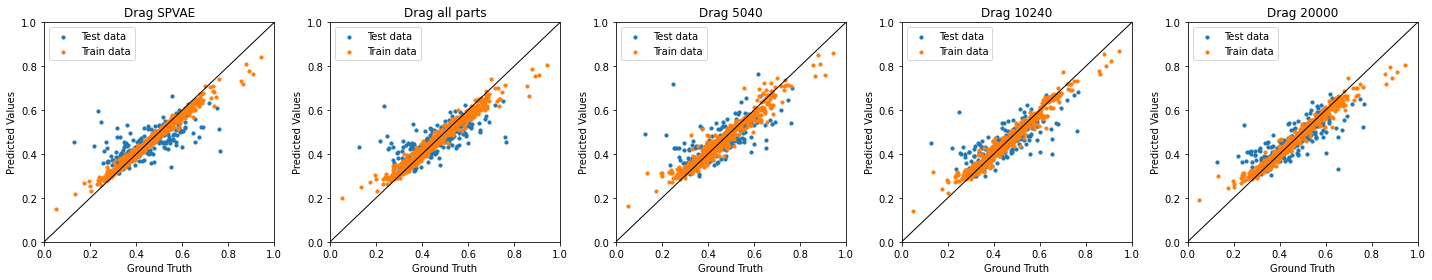

In [60]:
methods = ['SPVAE', 'all parts', '5040', '10240', '20000']
gt_test = df_test['GT']
gt_train = df_train['GT']
# Create a figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Iterate over the subplots and plot the data
for i, ax in enumerate(axes):
    method_data_test = df_test[methods[i]]
    method_data_train = df_train[methods[i]]
    max_value = 1
    min_value = 0
    ax.plot([min_value, max_value], [min_value, max_value], color='black', linewidth=1)
    ax.set_xlim([min_value, max_value])
    ax.set_ylim([min_value, max_value])
    ax.scatter(gt_test, method_data_test, s=10, label='Test data')
    ax.scatter(gt_train, method_data_train, s=10, label='Train data')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel(f'Predicted Values')
    ax.set_title(f'Drag {methods[i]}')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
#absolute error
df_ae_SPVAE_test = abs(df_test['SPVAE'] - df_test['GT'])
df_ae_all_parts_test = abs(df_test['all parts'] - df_test['GT'])
df_ae_5040_test = abs(df_test['5040'] - df_test['GT'])
df_ae_10240_test = abs(df_test['10240'] - df_test['GT'])
df_ae_20000_test = abs(df_test['20000'] - df_test['GT'])


In [62]:
# Perform t-test
t_statistic, two_sided_p_value = stats.ttest_rel(df_ae_SPVAE_test, df_ae_all_parts_test)
one_sided_p_value = two_sided_p_value / 2

# Print results
print("P-value:", one_sided_p_value)

P-value: 0.017164271802111112


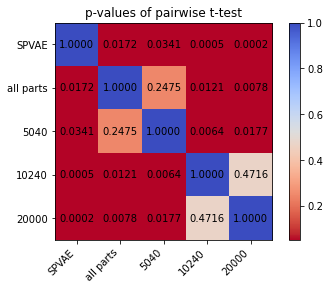

In [63]:
# absolute error
df_ae_SPVAE_test = abs(df_test['SPVAE'] - df_test['GT'])
df_ae_all_parts_test = abs(df_test['all parts'] - df_test['GT'])
df_ae_5040_test = abs(df_test['5040'] - df_test['GT'])
df_ae_10240_test = abs(df_test['10240'] - df_test['GT'])
df_ae_20000_test = abs(df_test['20000'] - df_test['GT'])

data_frames = [df_ae_SPVAE_test, df_ae_all_parts_test, df_ae_5040_test, df_ae_10240_test, df_ae_20000_test]
method_names = ['SPVAE', 'all parts', '5040', '10240', '20000']

# Create a symmetric matrix to store p-values
p_values = np.zeros((len(data_frames), len(data_frames)))

# Perform paired t-tests for all possible pairs and store p-values
for i in range(len(data_frames)):
    for j in range(i + 1, len(data_frames)):
        data1 = data_frames[i]
        data2 = data_frames[j]

        _, two_sided_p_value = stats.ttest_rel(data1, data2)
        p_values[i, j] = two_sided_p_value / 2 #one-sided p value
        p_values[j, i] = two_sided_p_value / 2 #one-sided p value

# Set diagonal values to NaN to exclude them from display
np.fill_diagonal(p_values, int(1))

# Plot the heatmap
fig, ax = plt.subplots()
im = ax.imshow(p_values, cmap='coolwarm_r', vmin=0.05) #reversed color map

# Show all ticks and labels
ax.set_xticks(np.arange(len(method_names)))
ax.set_yticks(np.arange(len(method_names)))
ax.set_xticklabels(method_names)
ax.set_yticklabels(method_names)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title
ax.set_title('p-values of pairwise t-test')

# Display values inside the heatmap
for i in range(len(method_names)):
    for j in range(len(method_names)):
        text = ax.text(j, i, f'{p_values[i, j]:.4f}',
                       ha="center", va="center", color="black")

plt.show()



In [64]:
# #mean absolute error
# mae_SPVAE_test = df_ae_SPVAE_test.mean()
# mae_all_parts_test = df_ae_all_parts_test.mean()
# mae_5040_test = df_ae_5040_test.mean()
# mae_10240_test = df_ae_10240_test.mean()
# mae_20000_test = df_ae_20000_test.mean()

# std_ae_SPVAE_test = df_ae_SPVAE_test.std()
# std_ae_all_parts_test = df_ae_all_parts_test.std()
# std_ae_5040_test = df_ae_5040_test.std()
# std_ae_10240_test = df_ae_10240_test.std()
# std_ae_20000_test = df_ae_20000_test.std()

# mae_list_test = [mae_SPVAE_test, mae_all_parts_test, mae_5040_test, mae_10240_test, mae_20000_test]
# std_ae_list_test = [std_ae_SPVAE_test, std_ae_all_parts_test, std_ae_5040_test, std_ae_10240_test, std_ae_20000_test]
# print(mae_list_test)
# print(std_ae_list_test)

In [65]:
#mean absolute error
models = ['SPVAE', 'all_parts', '5040', '10240', '20000']
mae_list_test = []
std_ae_list_test = []

for model in models:
    mae = globals()['df_ae_{}_test'.format(model)].mean()
    std = globals()['df_ae_{}_test'.format(model)].std()
    mae_list_test.append(mae)
    std_ae_list_test.append(std)

print(mae_list_test)
print(std_ae_list_test)


[0.06141823124285715, 0.057344734704761945, 0.055228241361904705, 0.05050476458095239, 0.05061861764761906]
[0.061424201984056855, 0.057817897269892414, 0.05994097192618939, 0.05345959920191486, 0.05046422609044022]


In [66]:
# #squared error
# df_se_SPVAE_test = df_ae_SPVAE_test ** 2
# df_se_all_parts_test = df_ae_all_parts_test ** 2
# df_se_5040_test = df_ae_5040_test ** 2
# df_se_10240_test = df_ae_10240_test ** 2
# df_se_20000_test = df_ae_20000_test ** 2

# #root mean squared error
# rmse_SPVAE_test = np.sqrt(df_se_SPVAE_test.mean()) 
# rmse_all_parts_test = np.sqrt(df_se_all_parts_test.mean())
# rmse_5040_test = np.sqrt(df_se_5040_test.mean())
# rmse_10240_test = np.sqrt(df_se_10240_test.mean())
# rmse_20000_test = np.sqrt(df_se_20000_test.mean())

# rmse_list_test = [rmse_SPVAE_test, rmse_all_parts_test, rmse_5040_test, rmse_10240_test, rmse_20000_test]
# print(rmse_list_test)

# # coefficient of determination
# # r^2 = 1 - SSE/SST 

# mean_gt_test = gt_test.mean()
# SST_test = np.sum((gt_test - mean_gt_test) ** 2)

# SSE_SPVAE_test = df_se_SPVAE_test.sum()
# SSE_all_parts_test = df_se_all_parts_test.sum()
# SSE_5040_test = df_se_5040_test.sum()
# SSE_10240_test = df_se_10240_test.sum()
# SSE_20000_test = df_se_20000_test.sum()

# r2_SPVAE_test = 1 - SSE_SPVAE_test / SST_test
# r2_all_parts_test = 1 - SSE_all_parts_test / SST_test
# r2_5040_test = 1 - SSE_5040_test / SST_test
# r2_10240_test = 1 - SSE_10240_test / SST_test
# r2_20000_test = 1 - SSE_20000_test / SST_test

# r2_test_list = [r2_SPVAE_test, r2_all_parts_test, r2_5040_test, r2_10240_test, r2_20000_test]
# print(r2_test_list)


In [67]:
rmse_list_test = []
r2_test_list = []

mean_gt_test = gt_test.mean()
SST_test = np.sum((gt_test - mean_gt_test) ** 2)

for model in models:
    df_se = globals()['df_se_{}_test'.format(model)]
    SSE = df_se.sum()
    rmse = np.sqrt(df_se.mean())
    r2 = 1 - SSE / SST_test
    rmse_list_test.append(rmse)
    r2_test_list.append(r2)

print(rmse_list_test)
print(r2_test_list)


[0.08675923796758231, 0.08133516599614428, 0.08140005906618311, 0.07345100957575797, 0.07139156616363515]
[0.4118037597341936, 0.4830512360455559, 0.4822260142761111, 0.578413859135638, 0.601723570135671]
